In [1]:
import pyforest
from icecream import ic
rng = np.random.default_rng(42)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

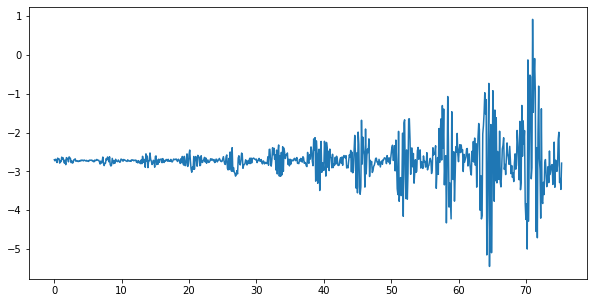

In [2]:
# generate synthethic data

x = np.arange(0,24*np.pi,0.1)
y = np.exp(np.sin(x)+0.05 * x + 1)

# inject random noise (comment out to see noiseless data)
arbitrary_magnitude = 0.015
y = (rng.random(len(x)) * 2 - 1) * y * arbitrary_magnitude + y
y = np.min(y) + y  # log undefined for <0

# plot it
plt.figure(figsize=(10,5))
plt.plot(x,y);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-3-80e8e7af9ba2>:3: RuntimeWarning: invalid value encountered in log
  plt.plot(x,np.log(y));


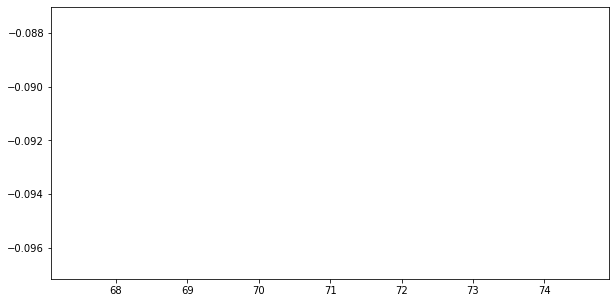

In [3]:
# take the log
plt.figure(figsize=(10,5))
plt.plot(x,np.log(y));

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

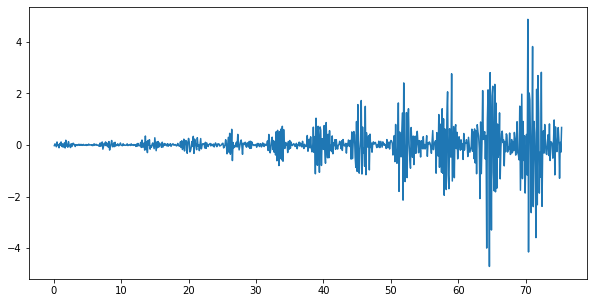

In [4]:
# take the diff
diffy = np.diff(y, n=1)

plt.figure(figsize=(10,5))
plt.plot(x[1:], diffy);


In [5]:
ic(len(y))
ic(len(diffy));

ic| len(y): 754
ic| len(diffy): 753


In [6]:
ic(np.cumsum(diffy)[:10])
ic((y[:-1] + diffy)[:10])

<IPython.core.display.Javascript object>

ic| np.cumsum(diffy)[:10]: array([-0.02787596,  0.01368791, -0.00038487, -0.07217864,  0.04189068,
                                   0.01625498,  0.02367012, -0.08701646, -0.03160383, -0.04803553])
ic| (y[:-1] + diffy)[:10]: array([-2.72883265, -2.68726877, -2.70134155, -2.77313532, -2.659066  ,
                                  -2.68470171, -2.67728656, -2.78797314, -2.73256052, -2.74899221])


array([-2.72883265, -2.68726877, -2.70134155, -2.77313532, -2.659066  ,
       -2.68470171, -2.67728656, -2.78797314, -2.73256052, -2.74899221])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

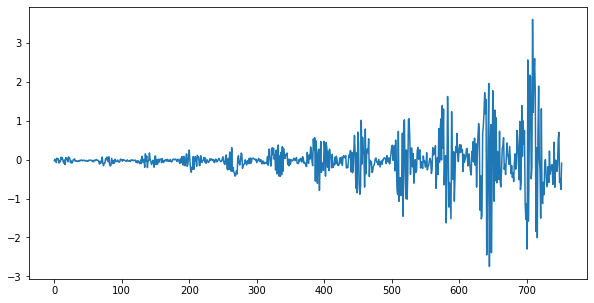

In [7]:
# inverting the diff (by itself)
plt.figure(figsize=(10,5))
# plt.plot(x[1:], y[:-1] + diffy)
plt.plot(np.cumsum(diffy))

<IPython.core.display.Javascript object>

<ipython-input-8-0c5f8cc20f1c>:2: RuntimeWarning: invalid value encountered in log
  ylog = np.log(y)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

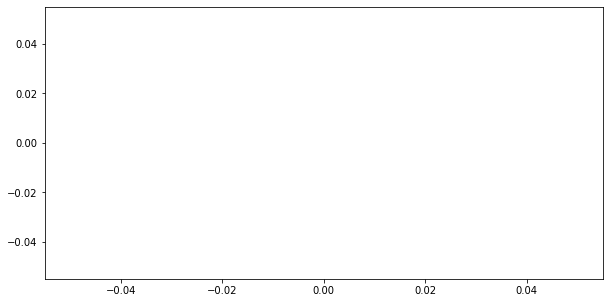

In [8]:
# taking the diff of the log and we're left with a base sinusoid (+- noise)
ylog = np.log(y)
ydifflog = np.diff(ylog)

plt.figure(figsize=(10,5))
plt.plot(x[1:], ydifflog)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

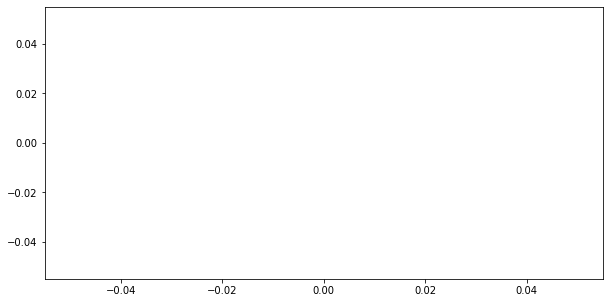

In [9]:
# inverting the diff
plt.figure(figsize=(10,5))
plt.plot(x[1:], ylog[:-1] + ydifflog)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

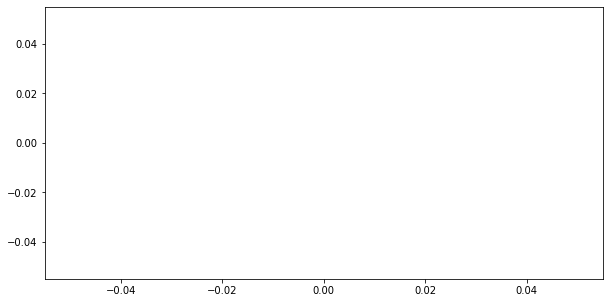

In [10]:
# inverting the diff and then inverting the log to get us back to the original
plt.figure(figsize=(10,5))
plt.plot(x[1:], np.exp(ylog[:-1] + ydifflog))

# Some Notes

Lag 1 will mean that we will have lost 1 measurement forever.  That's why we see the adjustments `[:-1]`
You can adjust it for the magnitude of the lag


In [11]:
# test the "first" values are the same
np.exp(ylog[:-1] + ydifflog)[0] == y[1]

<IPython.core.display.Javascript object>

False

In [12]:
# test the last values are the same
np.round(np.exp(ylog[:-1] + ydifflog)[-1], 6) == np.round(y[-1], 6)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

False

In [13]:
# test that all the values are the same
np.all(np.round(np.exp(ylog[:-1] + ydifflog), 6) == np.round(y[1:], 6))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

False

In [14]:
# resolution of np.float32 is 1e-6 so we have to round the above to a max of 6 decimal places 
print(np.finfo(np.float32))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------

